[0.         0.         0.         0.         0.         0.
 0.         0.         0.01038574 0.00703957 0.01127414 0.00610607
 0.00832862 0.00585222 0.00578751 0.00625312 0.00558531 0.00670235
 0.00616318 0.00680259 0.00603686]


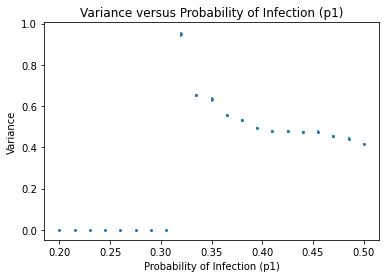

It took: 12.263029801845551 minutes to run


In [2]:
import matplotlib
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import time
import scipy as sp
from scipy import ndimage

start_time=time.time()

p1s=np.linspace(0.2,0.5,num=21)
N=50

InfectedDataPlot=pd.read_csv("InfectCutData.csv")

InfePlot=InfectedDataPlot.mean(axis=1)

VarPlot=np.zeros(len(p1s))
stdVar=np.zeros(len(VarPlot))

for i in range(len(p1s)):
        
        VarPlot[i]=(np.average(InfectedDataPlot.loc[[i]]**2)- InfePlot[i]**2)/(N*N)
        shuffles=np.zeros((100,10000))
        Imean=np.zeros(100)
        Imean2=np.zeros(100)
        Var=np.zeros(100)
        Var2=np.zeros(100)
       
       
        for j in range(100):
            
            for k in range(10000):
                
                position=np.random.randint(0,999)
                shuffles[j,k] = InfectedDataPlot.iat[i,position]
            Imean[j]=np.average(shuffles[j])
            Imean2[j]=np.average(shuffles[j]**2)
            Var[j]=(Imean2[j]-Imean[j]**2)/(N*N)
            Var2[j]=Var[j]**2
            
        stdVar[i] = math.sqrt(np.average(Var2)-np.average(Var)**2)

combination= np.vstack((p1s,VarPlot,stdVar)).T
VarianceData = pd.DataFrame(combination)
VarianceData.to_csv('VariancePlotCutData.csv',index=False)

plt.errorbar(p1s,VarPlot,yerr=stdVar,ms=2,fmt="o")
plt.title("Variance versus Probability of Infection (p1)")
plt.xlabel("Probability of Infection (p1)");
plt.ylabel("Variance");         

plt.show()

print("It took: "+str((time.time()-start_time)/60)+" minutes to run")